## Kaggle Credit Card Fraud Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd

df = pd.read_csv("../creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Dataset Overview

### Column Descriptions

| Column | Data Type| Description           |
| ------ | -------- | --------------------- |
| Time   | Int       | The time the transaction occured. The value is the number of seconds from the time the data recording began. The time column values are integers.                                                                             |
| V#     | Float     | The dataset includes 28 columns, named in the format of V1, V2, etc, that contain anonymized data represented as a continuous value. The distributions of values within each column varies, and the mean of each column is 0. |
| Amount | Float     | The transaction's dollar amount represented as a float value.                                                                                                                                                                 |
| Class  | Int       | The transaction's label, with 0 indicating a legitimate transaction and 1 indicating a fraudulent transaction.                                                                                                                |

### Summary Information
- Dataset Shape: 284807 rows × 31 columns
- Fraudulent Transactions: .17%, 492 total fraudulent transactions

In [6]:
print("\nDescriptive Statistics:")
df.describe().round(2)


Descriptive Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### Correlation Matrix

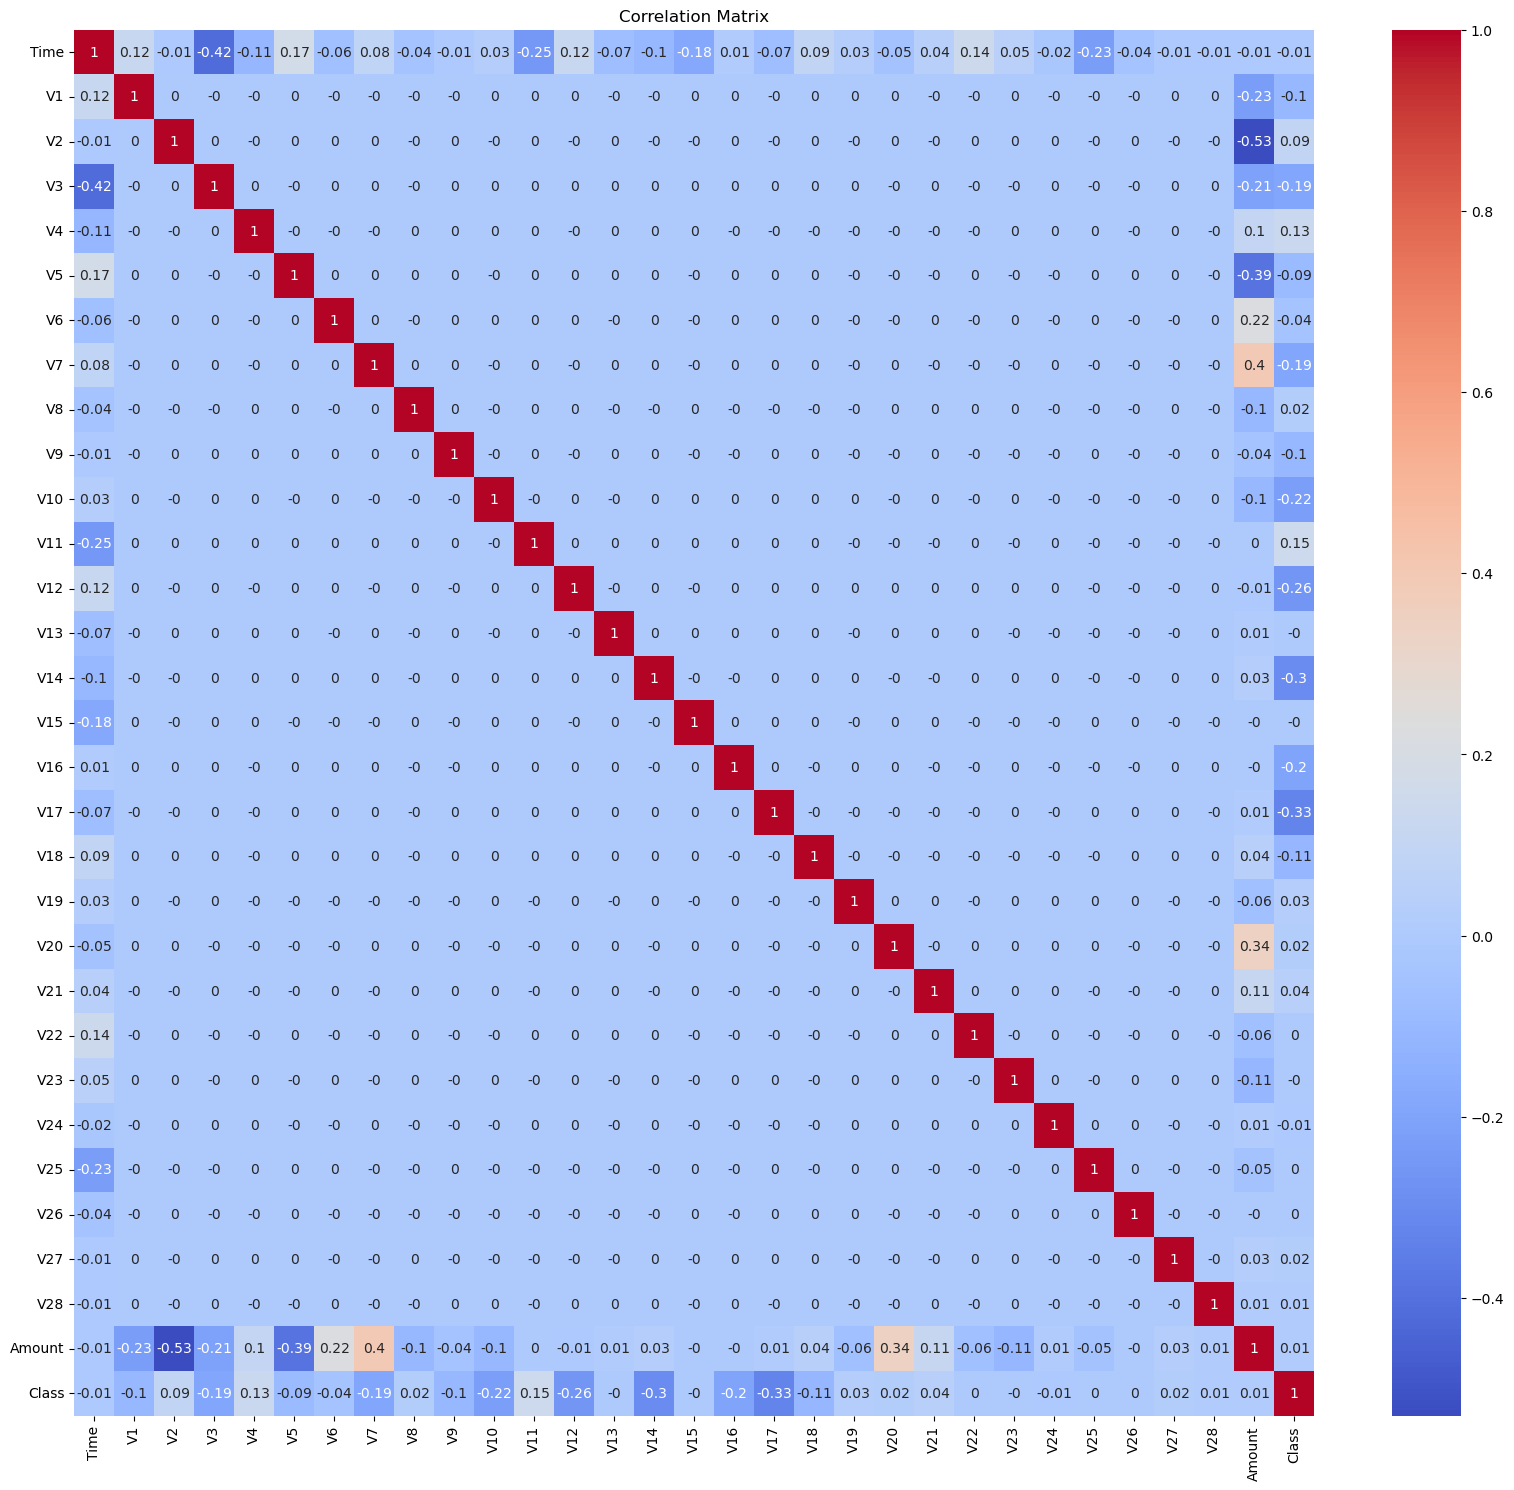

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr().round(2)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Column Exploration

- Class
- Time 
- Amount
- V Columns


### The Class Column

The `"Class"` column includes a label as to whether that transaction is fraudulent (`1`) or legitimate (`0`).

In [18]:
## Separate classes for future use
df_fraudulent = df[df["Class"] == 1]
df_legitimate = df[df["Class"] == 0]

## Calcuate class distribution
class_counts = df["Class"].value_counts()
percent_fradulent = (df['Class'].sum() / len(df)) * 100

print(f"Legitimate transaction count: {class_counts[0]}")
print(f"Fraudulent transaction count: {class_counts[1]}")
print(f"Fraudlent transaction Percentage: {percent_fradulent:.2f}%") 

Legitimate transaction count: 284315
Fraudulent transaction count: 492
Fraudlent transaction Percentage: 0.17%


## The Time Column
The time column represents the time in seconds elapsed between the row's transaction and the first transaction in the data set. The dataset includes 48 hours of transactions. We are not aware of the time recording began. 

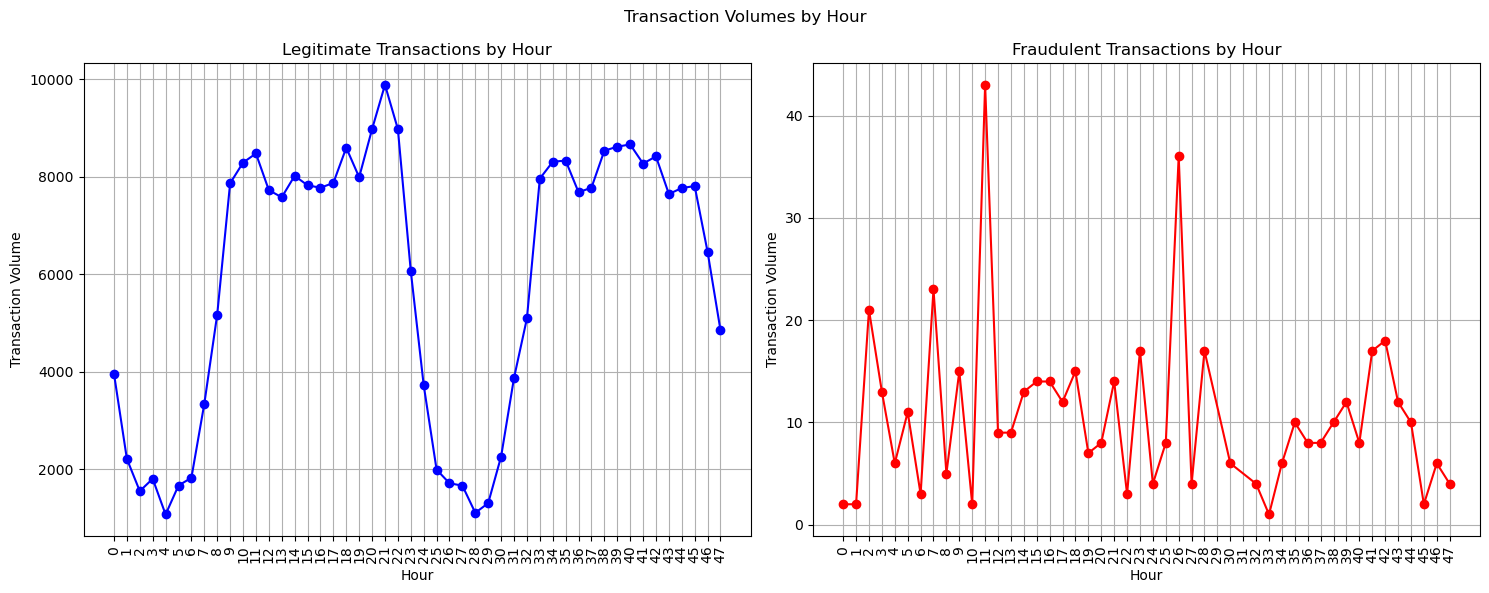

In [ ]:
# Bin transactions into hours
df['Hour'] = df["Time"] // 3600

# Separate legitimate and fraudulent transactions
transaction_counts = {
    'Legitimate': df[df["Class"] == 0]['Hour'].value_counts().sort_index(),
    'Fraudulent': df[df["Class"] == 1]['Hour'].value_counts().sort_index()
}

# Create Plots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

colors = ['b', 'r']
titles = ['Legitimate Transactions by Hour', 'Fraudulent Transactions by Hour']

for ax, (label, counts), color, title in zip(axes, transaction_counts.items(), colors, titles):
    ax.plot(counts.index, counts.values, marker = 'o', linestyle = '-', color = color)
    ax.set_title(title)
    ax.set_ylabel('Transaction Volume')
    ax.set_xlabel('Hour')
    ax.set_xticks(range(0, 48, 1))
    ax.tick_params(axis = 'x', rotation = 90)
    ax.grid(True)

fig.suptitle('Transaction Volumes by Hour')
plt.tight_layout()

## The Amount Column

The `"Amount"` column contains the value of that row's transaction.

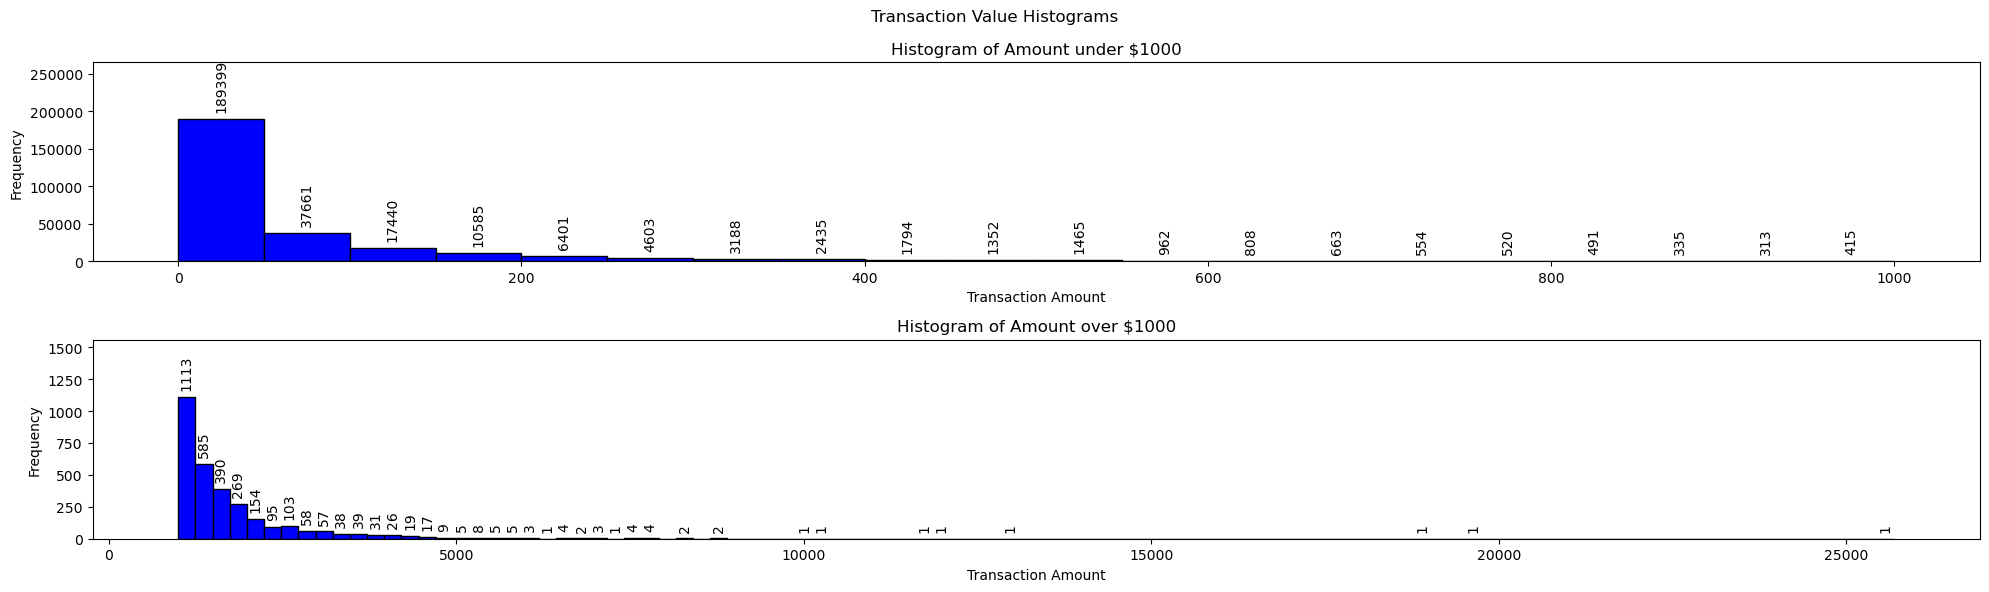

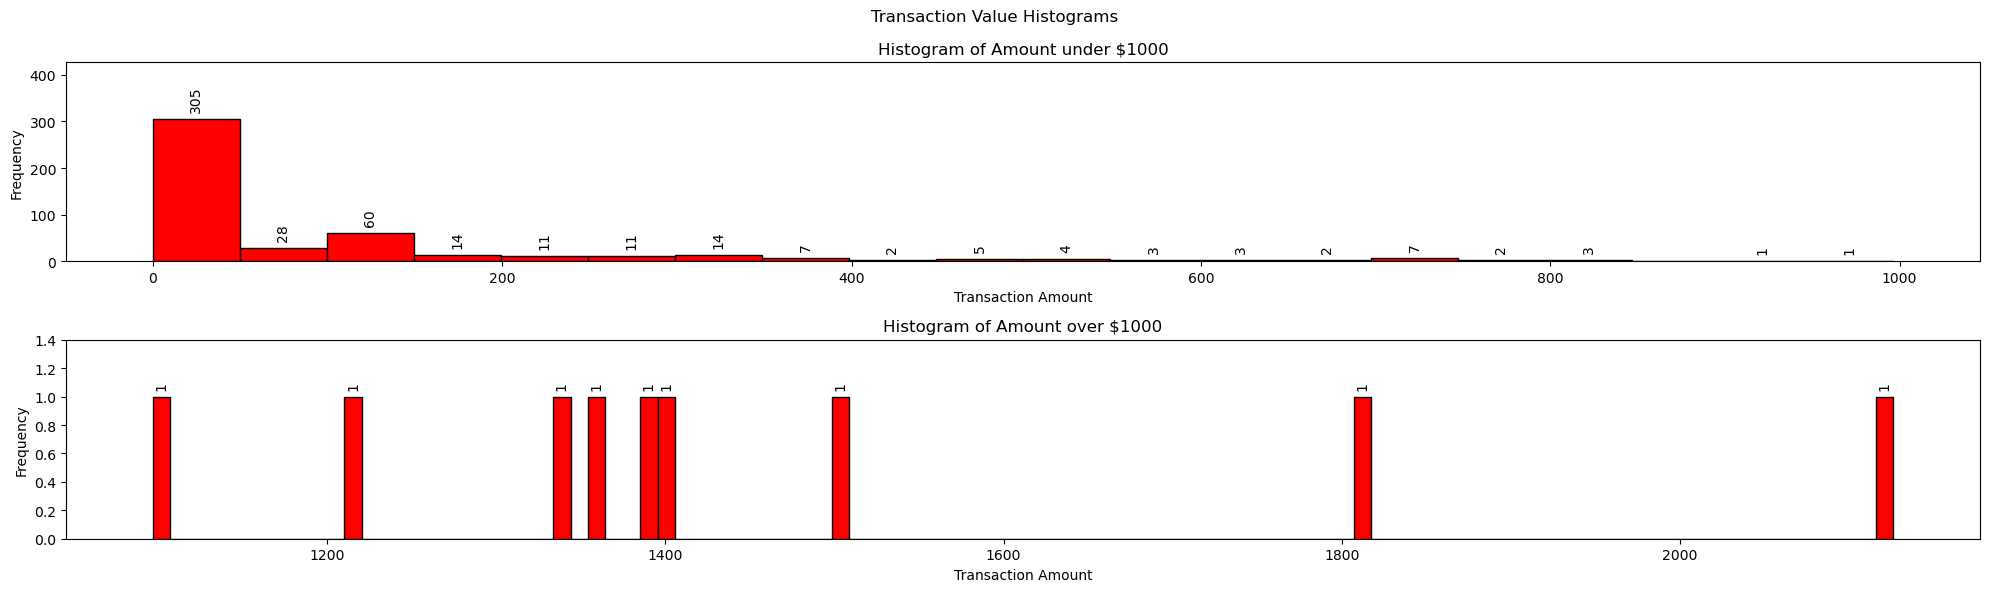

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

def split_histogram_transaction_amount(input_col, split_value, color):
    
    df_under = input_col[input_col <= split_value]
    df_over = input_col[input_col >= split_value]

    fig, axes = plt.subplots(2, 1, figsize=(20, 6))

    data = [(df_under, 20, f'Histogram of {input_col.name} under ${split_value}'),
            (df_over, 100, f'Histogram of {input_col.name} over ${split_value}')]

    for ax, (data, bins, title) in zip(axes, data):
        counts, bins, patches = ax.hist(data, bins = bins, color = color, edgecolor = 'black')
        ax.set_title(title)
        ax.set_xlabel('Transaction Amount')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x')#, rotation = 90)
        
        # Add bin counts on top of each bar
        for count, patch in zip(counts, patches):
            if count > 0:
                height = patch.get_height()
                ax.annotate(f'{int(count)}', xy = (patch.get_x() + patch.get_width() / 2, height),
                            xytext = (0, 5), textcoords = 'offset points', ha = 'center', va = 'bottom', rotation = 90)

        # Add extra space at the top of the y-axis to prevent overlap
        ax.set_ylim(top=max(counts) * 1.4)
                    
    fig.suptitle('Transaction Value Histograms')
    plt.tight_layout()
    plt.show()
    
split_histogram_transaction_amount(df_legitimate["Amount"], 1000, "blue")
split_histogram_transaction_amount(df_fraudulent["Amount"], 1000, "red")

## Exploring the V# Columns

In [50]:
v_cols_df = df.drop(["Time", "Amount"], axis = 1)
v_cols_df.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,...,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,...,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,...,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,...,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,...,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,1.00


In [51]:
v_cols_fraudulent = v_cols_df[v_cols_df["Class"] == 1].drop("Class", axis = 1)
v_cols_fraudulent.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,-5.68,...,0.68,0.37,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08
std,6.78,4.29,7.11,2.87,5.37,1.86,7.21,6.80,2.50,4.90,...,1.54,1.35,3.87,1.49,1.58,0.52,0.80,0.47,1.38,0.55
min,-30.55,-8.40,-31.10,-1.31,-22.11,-6.41,-43.56,-41.04,-13.43,-24.59,...,-3.68,-4.13,-22.80,-8.89,-19.25,-2.03,-4.78,-1.15,-7.26,-1.87
25%,-6.04,1.19,-8.64,2.37,-4.79,-2.50,-7.97,-0.20,-3.87,-7.76,...,-0.30,-0.17,0.04,-0.53,-0.34,-0.44,-0.31,-0.26,-0.02,-0.11
50%,-2.34,2.72,-5.08,4.18,-1.52,-1.42,-3.03,0.62,-2.21,-4.58,...,0.65,0.28,0.59,0.05,-0.07,-0.06,0.09,0.00,0.39,0.15
75%,-0.42,4.97,-2.28,6.35,0.21,-0.41,-0.95,1.76,-0.79,-2.61,...,1.65,0.82,1.24,0.62,0.31,0.29,0.46,0.40,0.83,0.38
max,2.13,22.06,2.25,12.11,11.10,6.47,5.80,20.01,3.35,4.03,...,5.23,11.06,27.20,8.36,5.47,1.09,2.21,2.75,3.05,1.78


In [52]:
v_cols_legitimate = v_cols_df[v_cols_df["Class"] == 0].drop("Class", axis = 1)
v_cols_legitimate.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,...,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00
mean,0.01,-0.01,0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,0.01,...,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.93,1.64,1.46,1.40,1.36,1.33,1.18,1.16,1.09,1.04,...,0.81,0.77,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-31.76,-73.22,-6.29,-14.74,...,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43
25%,-0.92,-0.60,-0.88,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.53,...,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05
50%,0.02,0.06,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.46,...,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08
max,2.45,18.90,9.38,16.88,34.80,73.30,120.59,18.71,15.59,23.75,...,5.59,39.42,22.61,10.50,22.53,4.58,7.52,3.52,31.61,33.85


### V Column Box Plots by Class

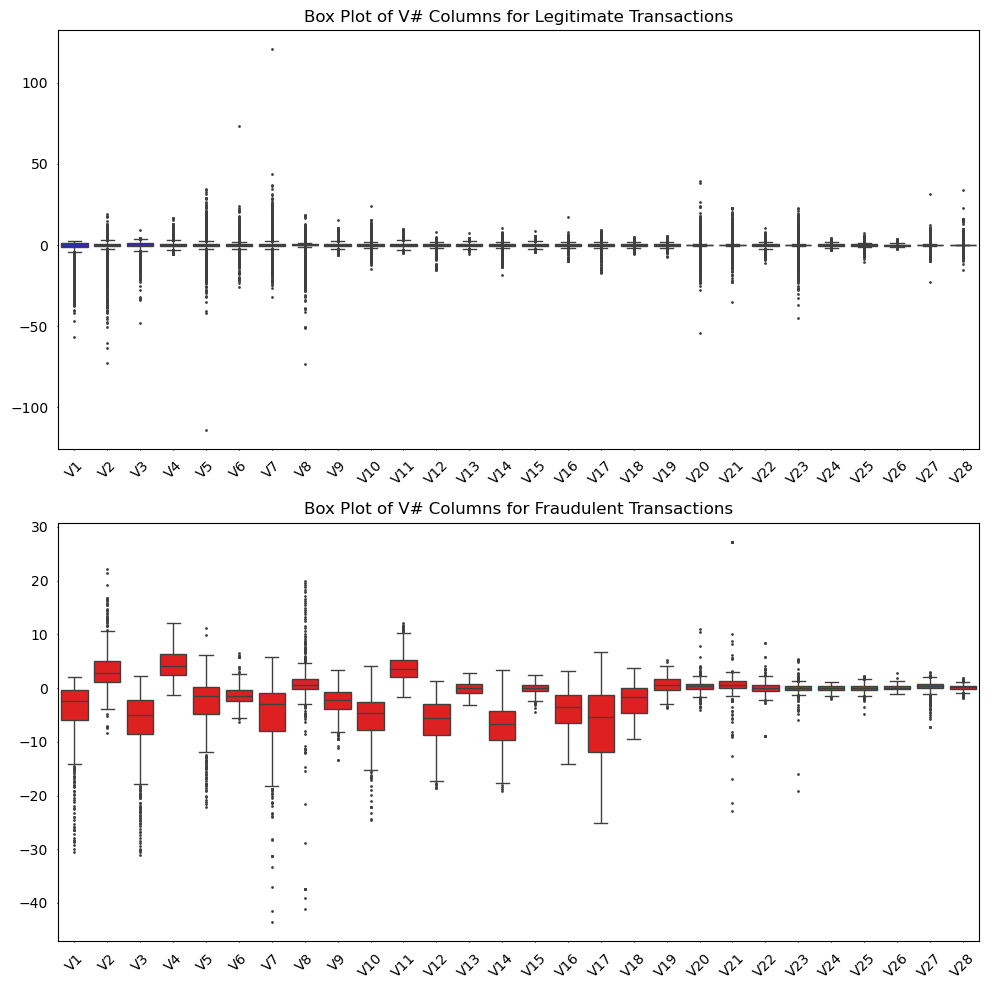

In [53]:
import matplotlib 

fig, axes = plt.subplots(2, 1, figsize = (10, 10))

# Plot for legitimate transactions
box_plot_legit = sns.boxplot(data = v_cols_legitimate, color = "blue", ax = axes[0])
axes[0].set_title('Box Plot of V# Columns for Legitimate Transactions')
axes[0].tick_params(axis = 'x', rotation = 45)

## Reduce outlier size for legitimate plot
for flier in box_plot_legit.findobj(match = matplotlib.lines.Line2D):
    flier.set(markerfacecolor = 'blue', markersize = 1)  

# Plot for fraudulent transactions
box_plot_fraud = sns.boxplot(data = v_cols_fraudulent, color = "red", ax = axes[1]) 
axes[1].set_title('Box Plot of V# Columns for Fraudulent Transactions')
axes[1].tick_params(axis = 'x', rotation = 45) 

## Reduce outlier size for fraudulent plot
for flier in box_plot_fraud.findobj(match = matplotlib.lines.Line2D):
    flier.set(markerfacecolor = 'red', markersize = 1)  

plt.tight_layout() 
plt.show()

### V Column Value Distribution Histogram by Class

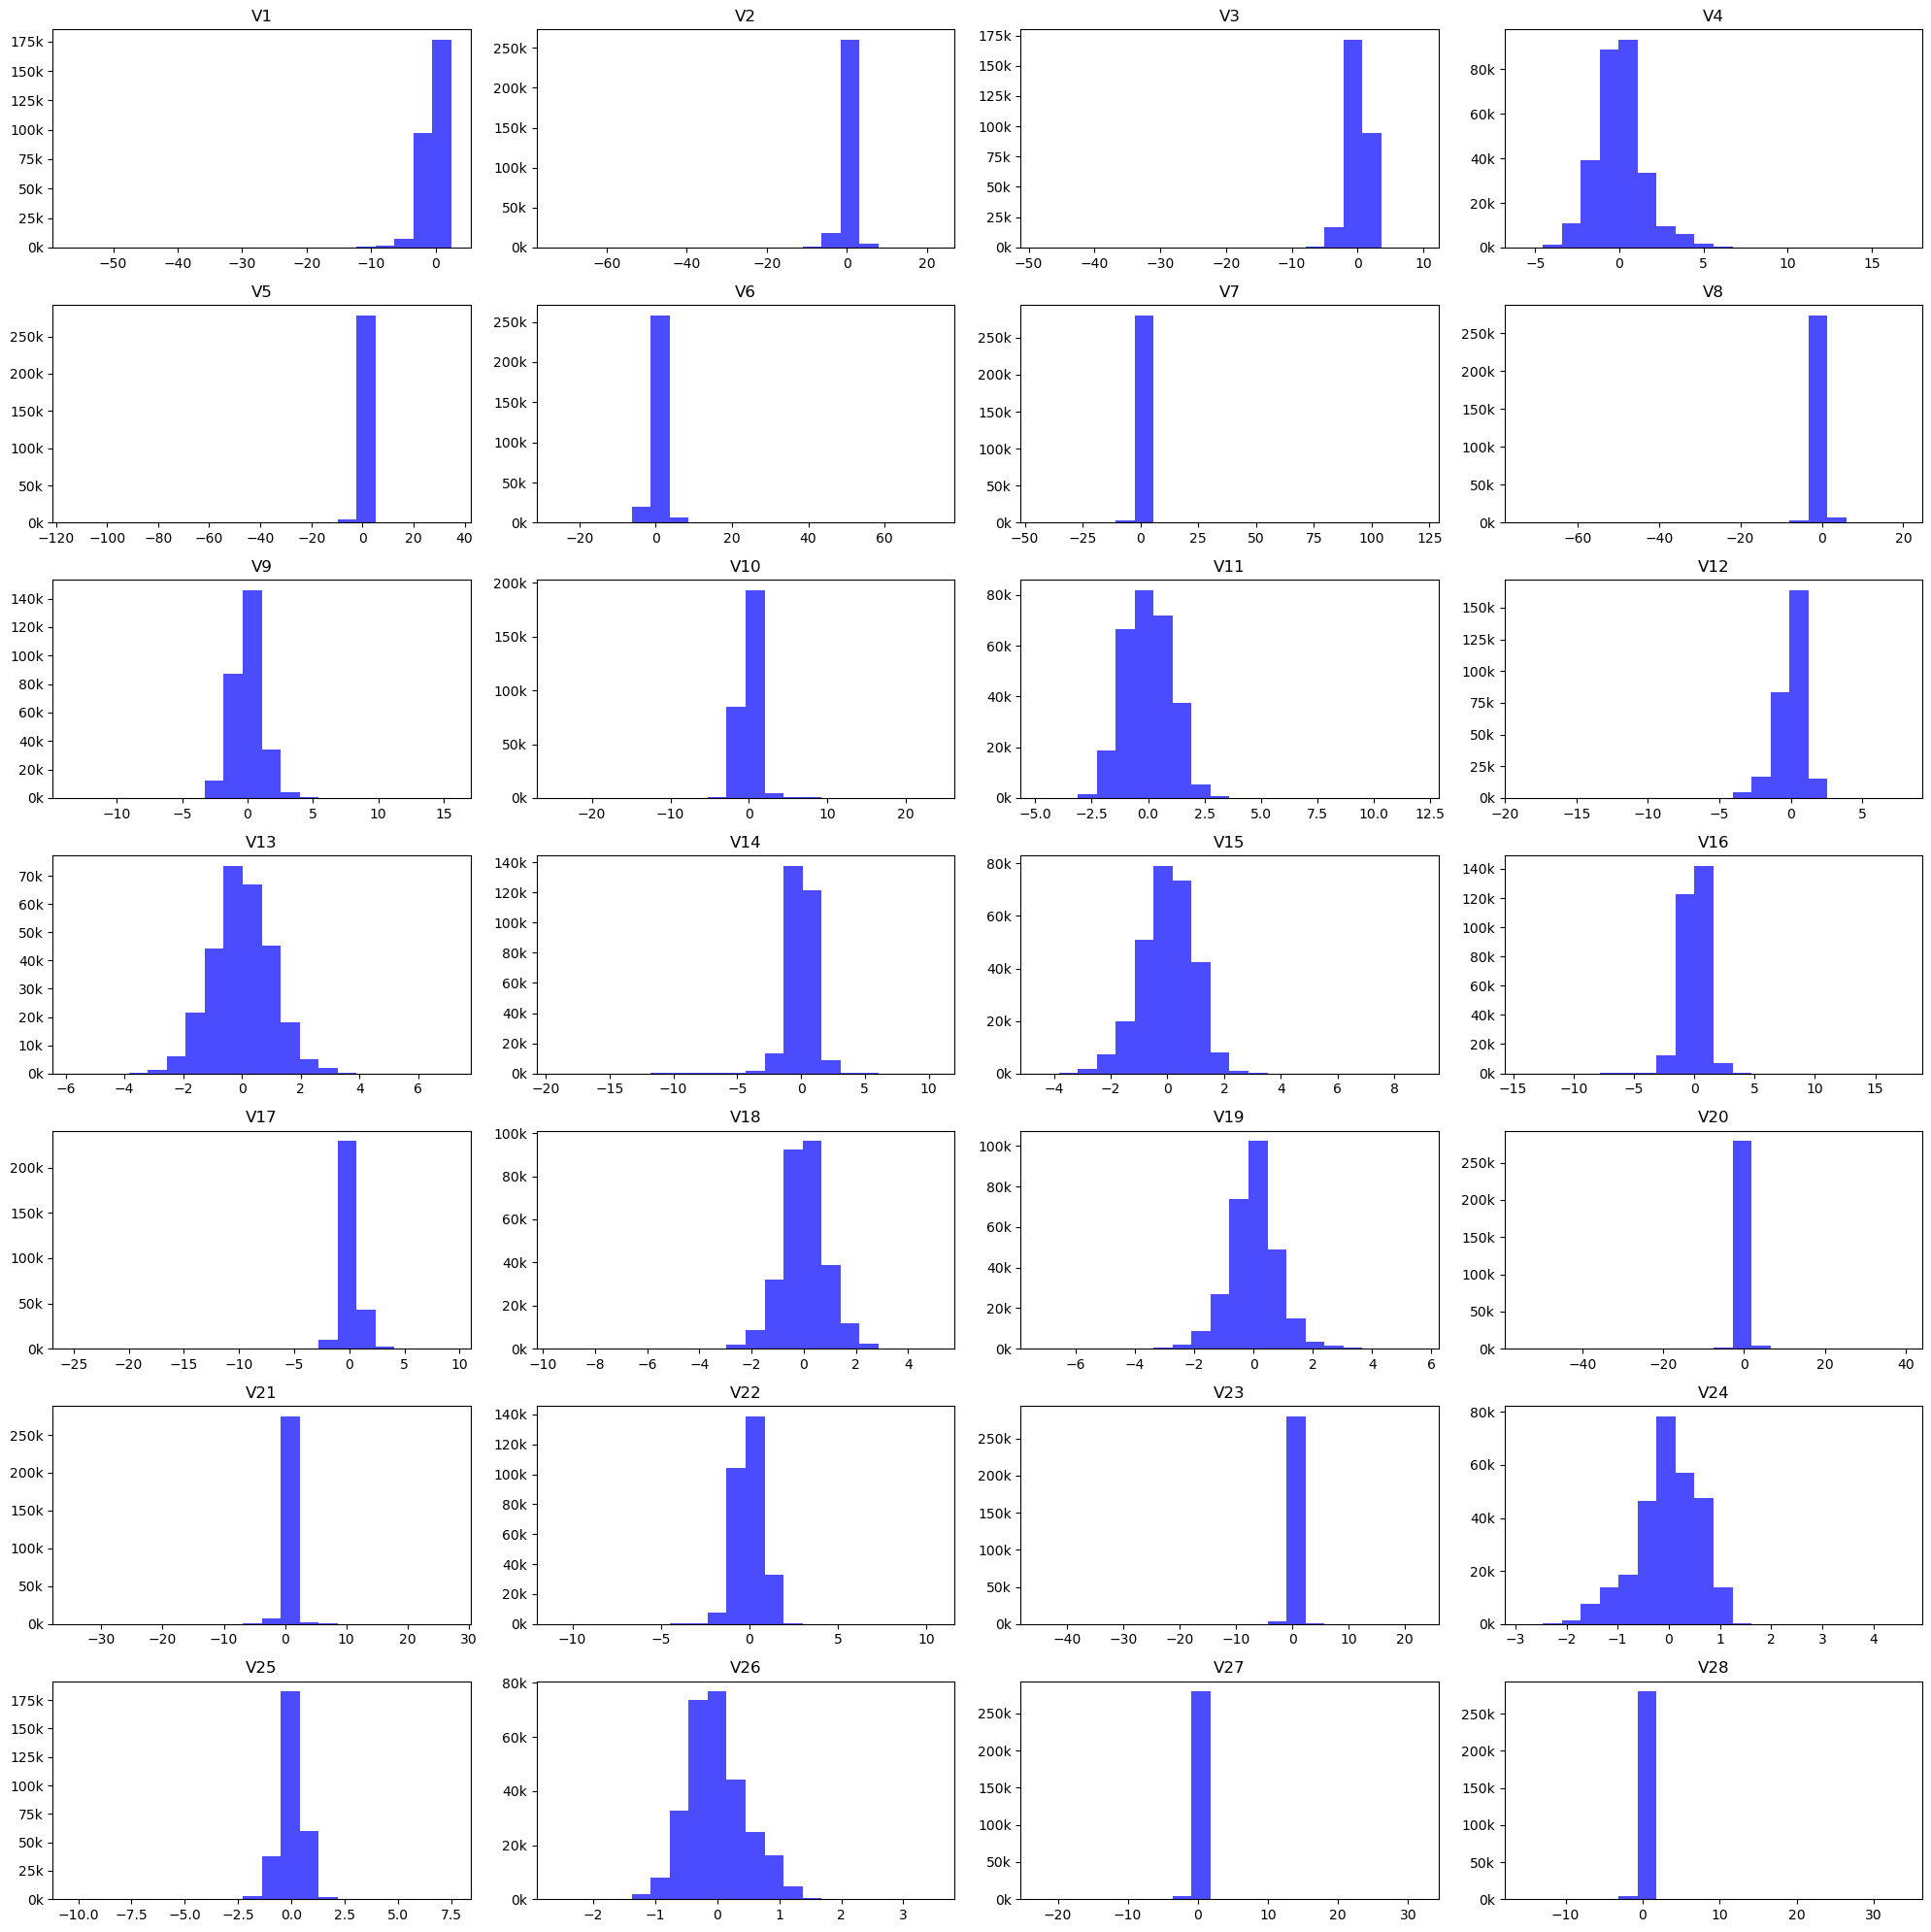

In [ ]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows = 7, ncols = 4, figsize = (20, 20))
axes = axes.flatten()

# Create function to format Y axis value 
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

# Plot histograms for each column
for i, col in enumerate(v_cols_df.columns):
    axes[i].hist(v_cols_df[col], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust layout
plt.tight_layout()
plt.show()

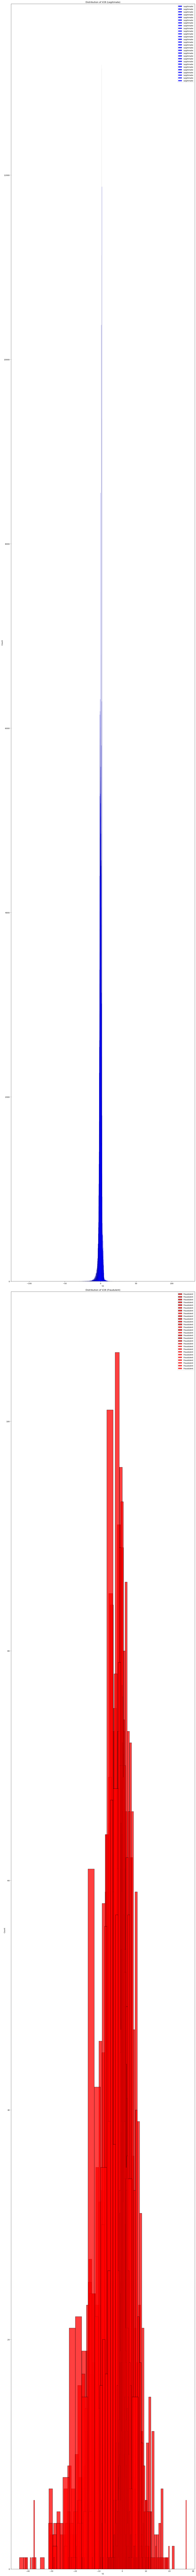

In [ ]:
df.corr(method='pearson', min_periods=1).round(2)["Class"]


def correlation_heatmap(dataframe):
    
    corr_table = dataframe.corr(method = "pearson").round(2)
        
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_table, annot=True, cmap='coolwarm', center=0)

    # Highlighting high correlations
    for i in range(len(corr_table.columns)):
        for j in range(i+1, len(corr_table.columns)):
            if abs(corr_table.iloc[i, j]) > 0.7:
                plt.text(i + 0.5, j + 0.5, '*', fontsize=20, color='white', ha='center', va='center')

    plt.title('Correlation Heatmap with High Correlations Highlighted')
    plt.show()